In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
""" Funções auxiliares para a resolução do exercício """

""" Rotina que calcula os coeficientes do polinômio de Chebyshev de maneira não-recursiva 

Parâmetros: w - vetor de frequências (sugestão: usar um vetor com amostras de 0 a 20 rad/s)
            wc - freq. de corte do filtro (em rad/s)
            n - ordem do filtro de Chebyshev
Saída:      Tn - vetor com os coeficientes calculados do polinômio de Chebyshev (possui o mesmo tamanho que w)

"""

def calcula_coeficientes(w,wc,n):
    
    Tn = np.zeros((w.size,))
    #determina os valores dos coeficientes segundo as expressões padronizadas
    Tn[abs(w) < wc] = np.cos(n*np.arccos(w[abs(w) < wc] / wc))
    Tn[abs(w) >= wc] = np.cosh(n*np.arccosh(w[abs(w) >= wc] / wc))
    return Tn


In [25]:
def plotar(eixox, eixoy, eixoxNome = "", eixoyNome= "", cor = "tab:blue", titulo = "", labels = None, limitesY = None, alfa = 1):
    if type(eixox) == list:
        for i in range(len(eixox)):
            plt.plot(eixox[i], eixoy[i], color = cor[i], label = labels[i] if labels != None else None, alpha = alfa)
    else:
        plt.plot(eixox, eixoy, color = cor, alpha = alfa)

    plt.title(titulo)
    plt.xlabel(eixoxNome)
    plt.ylabel(eixoyNome)
    if labels != None:
        plt.legend()
    # escala y  maxima em 100
    if limitesY != None:
        plt.ylim(limitesY[0], limitesY[1])
    plt.grid()
    plt.show()

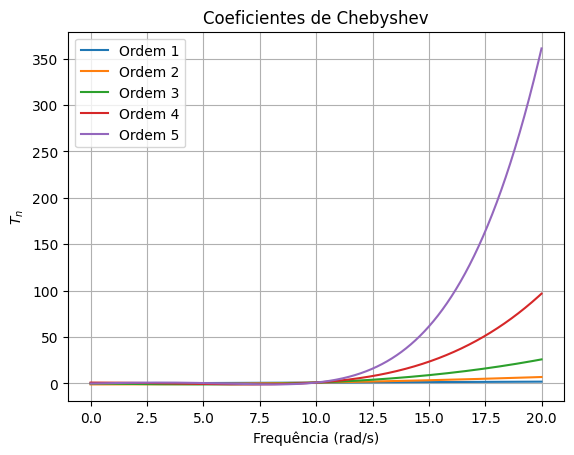

In [5]:
frequencia = np.arange(0, 20, 0.01)
frequenciaCorte = 10
frequencias = []
coeficientes = []
cores = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
labels = []
for i in range(1,6):
    frequencias.append(frequencia)
    coeficientes.append(calcula_coeficientes(frequencia, frequenciaCorte, i))
    labels.append("Ordem " + str(i))
plotar(frequencias, coeficientes, "Frequência (rad/s)", r"$T_n$", cores, "Coeficientes de Chebyshev", labels=labels)

In [6]:
def filtroChebyshev(w, wc, n, e):
    Tn = calcula_coeficientes(w, wc, n)
    Hc = 1 / np.sqrt(1 + e**2 * Tn**2)
    return Hc

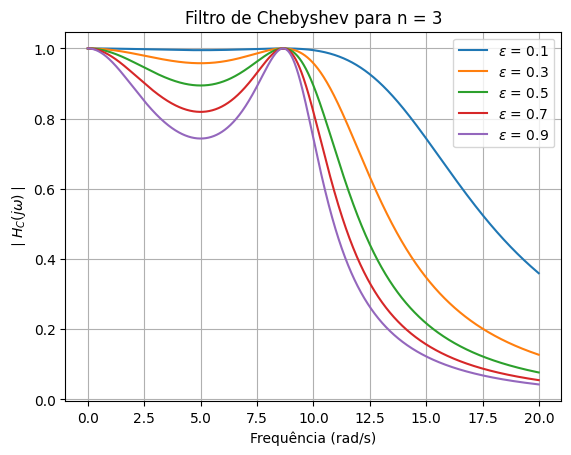

In [7]:
frequencia = np.arange(0, 20, 0.01)
frequenciaCorte =10
e = 0.2
frequencias = []
coeficientes = []
cores = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
labels = []
for i in range(1,11,2):
    frequencias.append(frequencia)
    coeficientes.append(filtroChebyshev(frequencia, frequenciaCorte, 3, i/10))
    labels.append(r"$\epsilon$ = " + str(i/10))
plotar(frequencias, coeficientes, "Frequência (rad/s)", r"$\mid H_C(j\omega)\mid $", cores, f"Filtro de Chebyshev para n = {3}", labels=labels, limitesY=None)

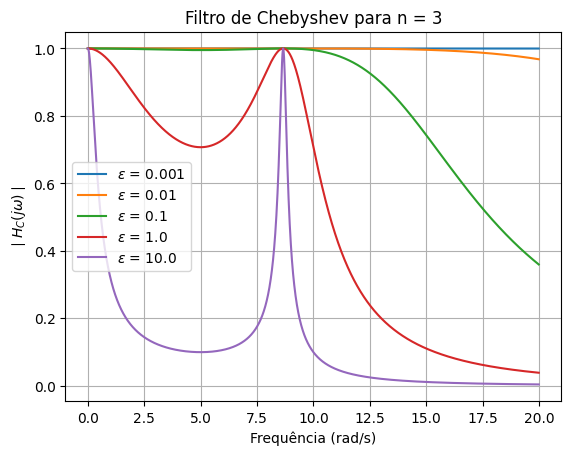

In [8]:
frequencia = np.arange(0, 20, 0.01)
frequenciaCorte =10
e = 0.2
frequencias = []
coeficientes = []
cores = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
labels = []
for i in (1,10,100,1000,10000):
    frequencias.append(frequencia)
    coeficientes.append(filtroChebyshev(frequencia, frequenciaCorte, 3, i/1000))
    labels.append(r"$\epsilon$ = " + str(i/1000))
plotar(frequencias, coeficientes, "Frequência (rad/s)", r"$\mid H_C(j\omega)\mid $", cores, f"Filtro de Chebyshev para n = {3}", labels=labels, limitesY=None)

In [9]:
def filtroButterworth(w, wc, n):
    Hb = 1 / np.sqrt(1+(w/wc)**(2*n))
    return Hb

/tmp/ipykernel_7227/1329865178.py:2: RuntimeWarning: overflow encountered in power
  Hb = 1 / np.sqrt(1+(w/wc)**(2*n))


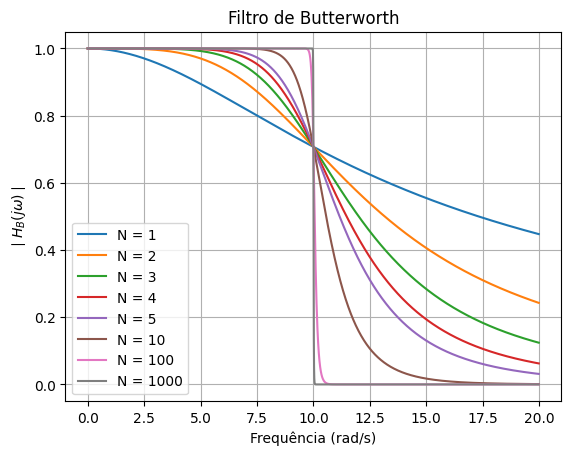

In [10]:
frequencia = np.arange(0, 20, 0.01)
frequenciaCorte =10
e = 0.2
frequencias = []
coeficientes = []
cores = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray"]
labels = []
for i in (1,2,3,4,5,10,100,1000):
    frequencias.append(frequencia)
    coeficientes.append(filtroButterworth(frequencia, frequenciaCorte, i))
    labels.append("N = " + str(i))
plotar(frequencias, coeficientes, "Frequência (rad/s)", r"$\mid H_B(j\omega)\mid $", cores, f"Filtro de Butterworth", labels=labels, limitesY=None)

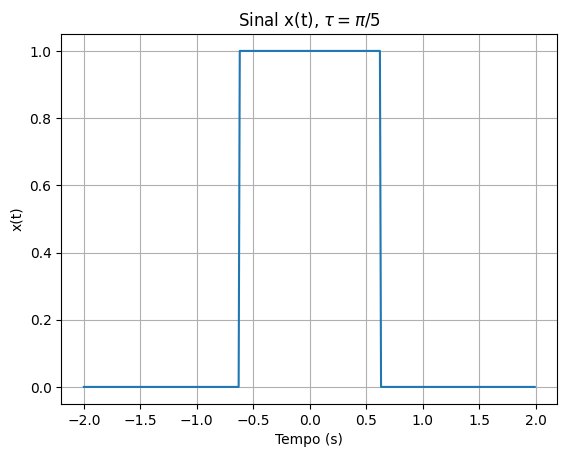

In [14]:
# Sinal x(t):
t = np.arange(-2, 2, 0.01)
x = np.zeros((t.size,))
borda = np.pi/5
x[abs(t) <= borda] = 1
plotar(t, x, "Tempo (s)", "x(t)", "tab:blue", r"Sinal x(t), $\tau = \pi / 5$", limitesY=None)

/tmp/ipykernel_7227/787251392.py:2: RuntimeWarning: invalid value encountered in true_divide
  X  = 2*np.sin(omega*borda) / omega


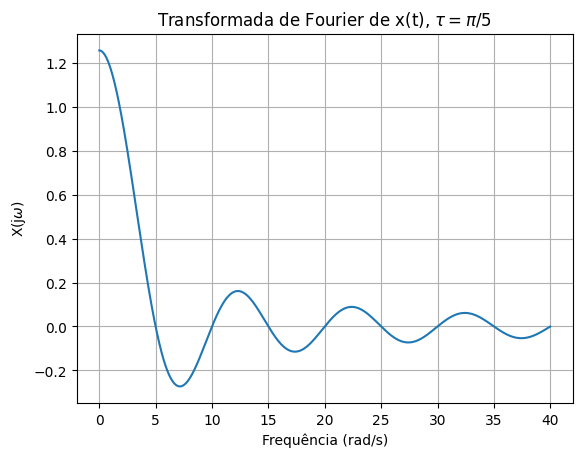

In [16]:
omega = np.arange(0, 40, 0.01)
X  = 2*np.sin(omega*borda) / omega
plotar(omega, X, "Frequência (rad/s)", "X(j$\omega$)", "tab:blue", r"Transformada de Fourier de x(t), $\tau = \pi / 5$", limitesY=None)

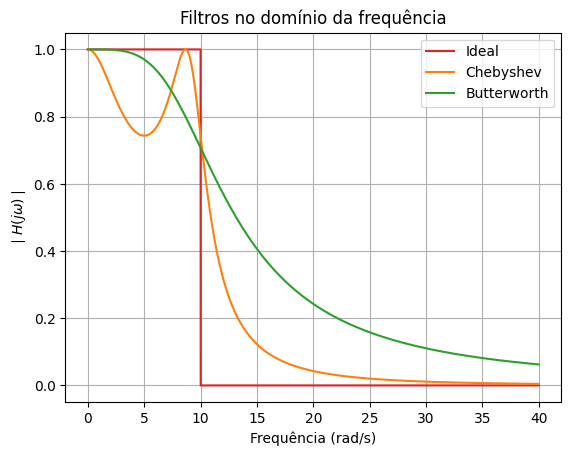

In [21]:
omega = np.arange(0, 40, 0.01)
Xideal  = np.zeros((omega.size,))
Xideal[abs(omega) <= 10] = 1
Xc = filtroChebyshev(omega, 10, 3, 0.9)
Xb = filtroButterworth(omega, 10, 2)


omegas = [omega, omega, omega]
filtros = [Xideal, Xc, Xb]
cores = ["tab:red", "tab:orange", "tab:green"]
labels = ["Ideal","Chebyshev","Butterworth"]
plotar(omegas, filtros, "Frequência (rad/s)", r"$\mid H(j\omega)\mid $", cores, f"Filtros no domínio da frequência", labels=labels, limitesY=None)

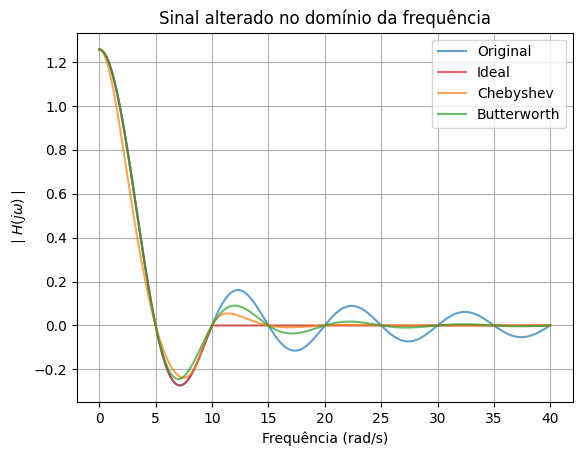

In [28]:
YIdeal = X*Xideal
YC = X*Xc
YB = X*Xb

omegas = [omega, omega, omega, omega]
filtros = [X, YIdeal, YC, YB]
cores = ["tab:blue", "tab:red", "tab:orange", "tab:green"]
labels = ["Original","Ideal","Chebyshev","Butterworth"]
plotar(omegas, filtros, "Frequência (rad/s)", r"$\mid H(j\omega)\mid $", cores, f"Sinal alterado no domínio da frequência", labels=labels, limitesY=None, alfa = 0.7)
